In [27]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
tickers = ['NVO', 'JPM', 'AMZN', 'SQM', 'NVDA', '^GSPC']

prices = yf.download(tickers,start='2020-01-01', end='2025-08-22')['Close']
prices

C:\Users\samue\AppData\Local\Temp\ipykernel_18428\304901767.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(tickers,start='2020-01-01', end='2025-08-22')['Close']
[*********************100%***********************]  6 of 6 completed


Ticker,AMZN,JPM,NVDA,NVO,SQM,^GSPC
Date,,,,,,
2020-01-02,94.900497,120.154716,5.971745,26.509840,21.339224,3257.850098
2020-01-03,93.748497,118.569099,5.876163,25.942026,21.172825,3234.850098
2020-01-06,95.143997,118.474800,5.900805,25.896603,21.497702,3246.280029
2020-01-07,95.343002,116.460670,5.972244,25.869350,22.076155,3237.179932
2020-01-08,94.598503,117.369164,5.983445,25.823923,22.115778,3253.050049
...,...,...,...,...,...,...
2025-08-15,231.029999,290.489990,180.449997,52.410000,45.080002,6449.799805
2025-08-18,231.490005,291.529999,182.009995,53.750000,46.130001,6449.149902
2025-08-19,228.009995,290.660004,175.639999,54.779999,45.049999,6411.370117


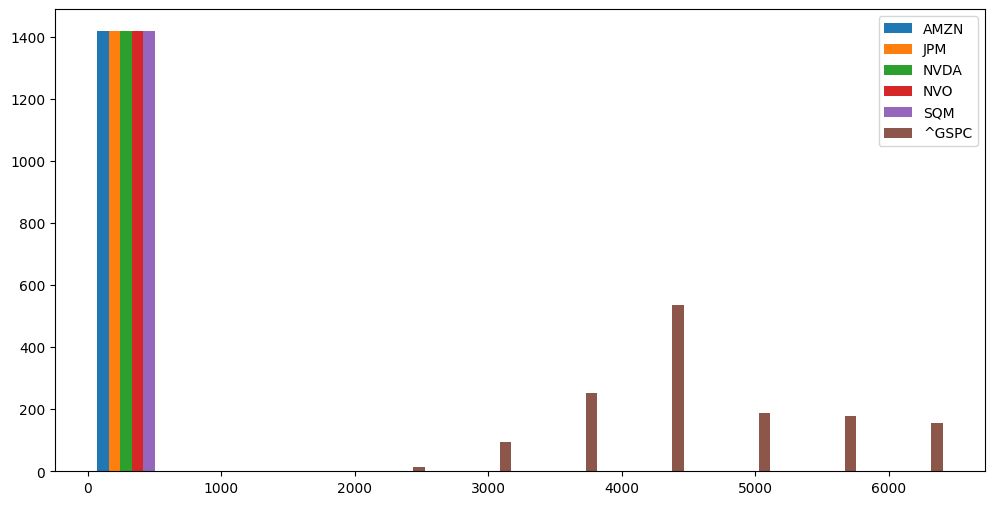

In [29]:
plt.figure(figsize=(12,6))
plt.hist(prices, label=prices.columns)
plt.legend()
plt.show();

In [30]:
#Forma complicada de sacar el rendimiento
rend = (prices / prices.shift(1) - 1).dropna()
rend

Ticker,AMZN,JPM,NVDA,NVO,SQM,^GSPC
Date,,,,,,
2020-01-03,-0.012139,-0.013196,-0.016006,-0.021419,-0.007798,-0.007060
2020-01-06,0.014886,-0.000795,0.004194,-0.001751,0.015344,0.003533
2020-01-07,0.002092,-0.017000,0.012107,-0.001052,0.026908,-0.002803
2020-01-08,-0.007809,0.007801,0.001875,-0.001756,0.001795,0.004902
2020-01-09,0.004799,0.003652,0.010983,0.010378,-0.021856,0.006655
...,...,...,...,...,...,...
2025-08-15,0.000216,-0.012476,-0.008625,0.028656,-0.010101,-0.002897
2025-08-18,0.001991,0.003580,0.008645,0.025568,0.023292,-0.000101
2025-08-19,-0.015033,-0.002984,-0.034998,0.019163,-0.023412,-0.005858


In [31]:
#Con fórmula
rend = prices.pct_change().dropna()
rend

Ticker,AMZN,JPM,NVDA,NVO,SQM,^GSPC
Date,,,,,,
2020-01-03,-0.012139,-0.013196,-0.016006,-0.021419,-0.007798,-0.007060
2020-01-06,0.014886,-0.000795,0.004194,-0.001751,0.015344,0.003533
2020-01-07,0.002092,-0.017000,0.012107,-0.001052,0.026908,-0.002803
2020-01-08,-0.007809,0.007801,0.001875,-0.001756,0.001795,0.004902
2020-01-09,0.004799,0.003652,0.010983,0.010378,-0.021856,0.006655
...,...,...,...,...,...,...
2025-08-15,0.000216,-0.012476,-0.008625,0.028656,-0.010101,-0.002897
2025-08-18,0.001991,0.003580,0.008645,0.025568,0.023292,-0.000101
2025-08-19,-0.015033,-0.002984,-0.034998,0.019163,-0.023412,-0.005858


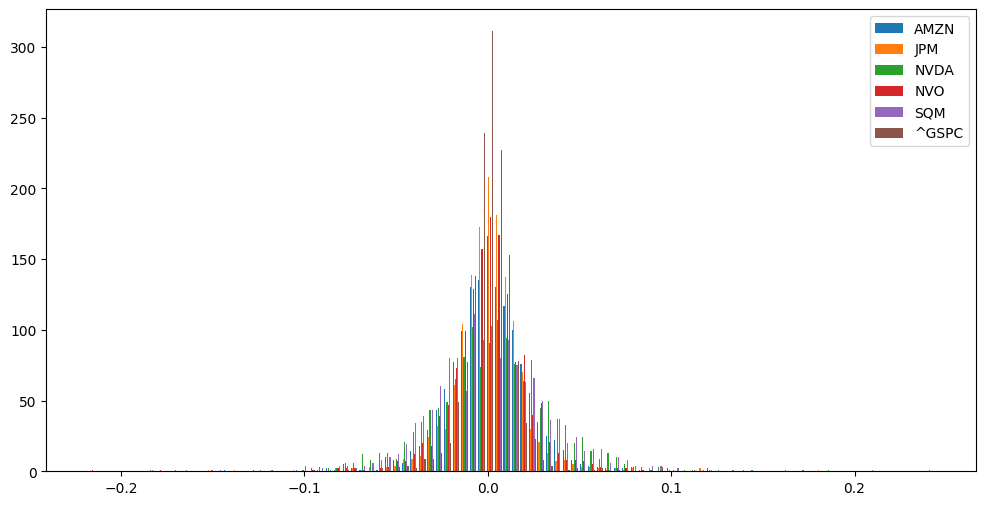

In [32]:
plt.figure(figsize=(12,6))
plt.hist(rend, label=rend.columns, bins=100)
plt.legend()
plt.show();

In [33]:
mean = rend.mean()*100*252  #Rendimiento anualizado
mean

Ticker
AMZN     21.597329
JPM      20.861347
NVDA     74.730864
NVO      19.216140
SQM      26.742928
^GSPC    14.231965
dtype: float64

*Análisis*: NVDA tiene el rendimiento anualizado más alto. Con SOLO esta información, uno quisiera invertir en NVDA, sin embargo, es importante considerar otros factores como la volatilidad y el riesgo asociado a la inversión.

In [34]:
rend.var()*100*252  #Varianza anualizada, casi nunca se utiliza en finanzas

Ticker
AMZN     12.963561
JPM      10.207932
NVDA     29.323648
NVO      11.963817
SQM      26.669007
^GSPC     4.577013
dtype: float64

In [35]:
vol = rend.std()*100*252**0.5  #Volatilidad anualizada
vol

Ticker
AMZN     36.004946
JPM      31.949854
NVDA     54.151314
NVO      34.588751
SQM      51.642044
^GSPC    21.393954
dtype: float64

In [ ]:
#Coeficiente de variación (CV)
#División de la desviación estándar entre la media
#Quieres un valor bajo (Entre 0 y 1)
cv = vol / mean
cv

Ticker
AMZN     1.667102
JPM      1.531534
NVDA     0.724618
NVO      1.799984
SQM      1.931054
^GSPC    1.503233
dtype: float64

In [38]:
skew = rend.skew()
skew

Ticker
AMZN     0.106892
JPM      0.375630
NVDA     0.348515
NVO     -0.918657
SQM     -0.033182
^GSPC   -0.317617
dtype: float64

# Actividad de clase

In [ ]:
msft = yf.download('MSFT',start='2019-01-01', end='2024-01-01')['Close']

rend_msft = msft.pct_change().dropna()

#Rendimiento diario y anual
rend_msft.mean() * 100, rend_msft.mean() * 100 * 252

C:\Users\samue\AppData\Local\Temp\ipykernel_18428\3025991009.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  msft = yf.download('MSFT',start='2019-01-01', end='2024-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


(Ticker
 MSFT    0.127101
 dtype: float64,
 Ticker
 MSFT    32.0295
 dtype: float64)

In [ ]:
#Varianza diaria y anual
rend_msft.var() * 100, rend_msft.var() * 100 * 252

(Ticker
 MSFT    368.925425
 dtype: float64,
 Ticker
 MSFT    92969.207031
 dtype: float64)

In [ ]:
#Desviación estándar diaria y anual
rend_msft.std() * 100, rend_msft.std() * 100 * 252**0.5

(Ticker
 MSFT    192.074315
 dtype: float64,
 Ticker
 MSFT    3049.085224
 dtype: float64)

In [50]:
#Sharpe Ratio
(rend_msft.std() * 252**0.5) / (rend_msft.mean() * 252)

Ticker
MSFT    0.951962
dtype: float64

In [47]:
rend_msft.skew()

Ticker
MSFT   -0.004064
dtype: float64

C:\Users\samue\AppData\Local\Temp\ipykernel_18428\908228409.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


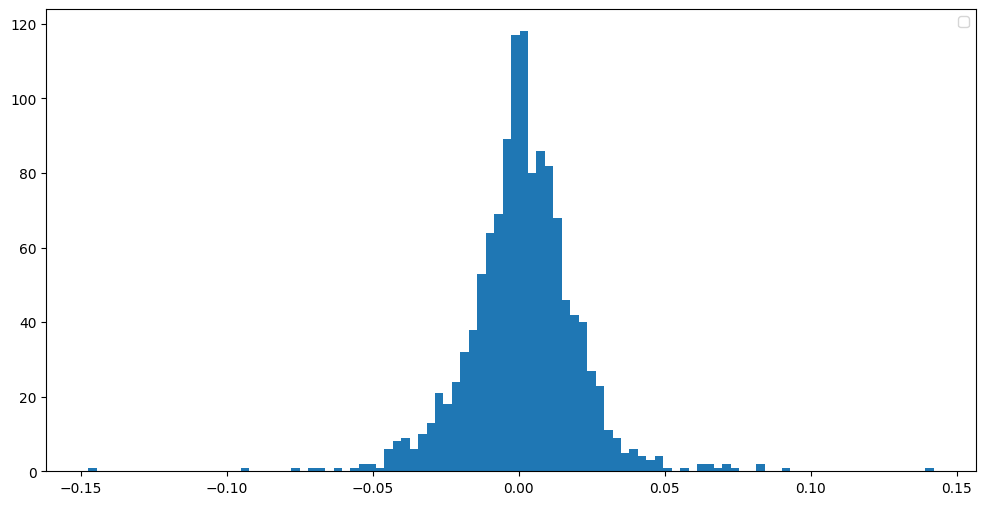

In [48]:
plt.figure(figsize=(12,6))
plt.hist(rend_msft, bins=100)
plt.legend()
plt.show();